            Sales
Date             
2023-01-01    193
2023-01-02    188
2023-01-03    128
2023-01-04    462
2023-01-05    116

Missing Values:
Sales    0
dtype: int64


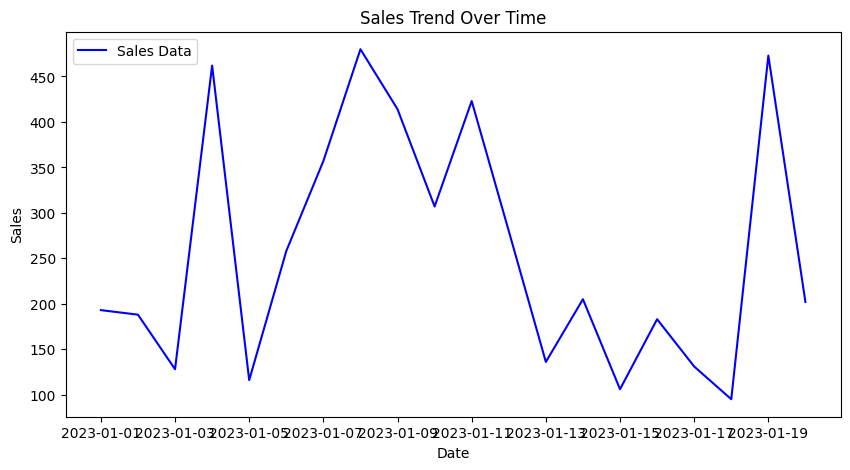


ADF Statistic: -0.9249638102937209
P-Value: 0.779640363487105
The data is non-stationary. Differencing is needed.


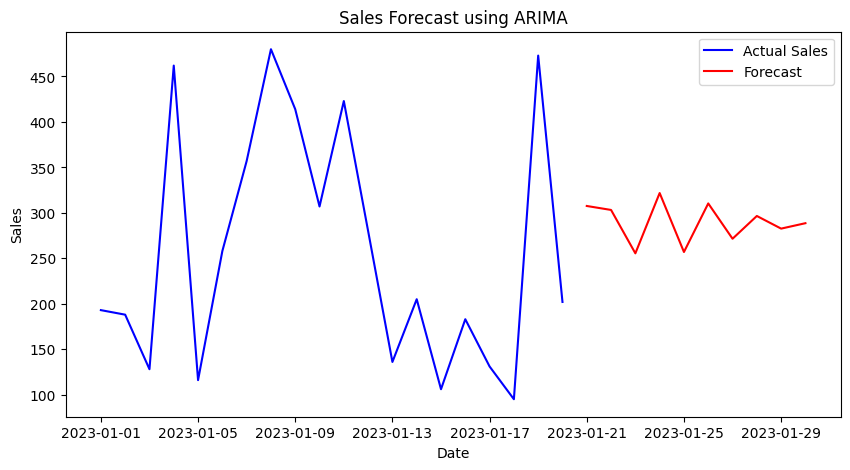


Forecasted Sales for Next 10 Days:
        Date  Forecasted Sales
0 2023-01-21        307.569775
1 2023-01-22        303.201055
2 2023-01-23        255.466241
3 2023-01-24        321.799446
4 2023-01-25        256.941191
5 2023-01-26        310.375103
6 2023-01-27        271.536894
7 2023-01-28        296.571556
8 2023-01-29        282.666212
9 2023-01-30        288.631915


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('sale_data.csv', parse_dates=['Date'], index_col='Date')
df.index = pd.to_datetime(df.index)
df = df[['Sales']]
df = df.asfreq('D')
df['Sales'] = df['Sales'].interpolate(method='linear')

print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label="Sales Data", color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

result = adfuller(df['Sales'])
print(f"\nADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

if result[1] > 0.05:
    print("The data is non-stationary. Differencing is needed.")
else:
    print("The data is stationary.")

model = ARIMA(df['Sales'], order=(2, 1, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], label="Actual Sales", color='blue')
plt.plot(forecast_dates, forecast, label="Forecast", color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast using ARIMA")
plt.legend()
plt.show()

print("\nForecasted Sales for Next 10 Days:")
forecast_output = pd.DataFrame({'Date': forecast_dates, 'Forecasted Sales': forecast.values})
print(forecast_output)


   Age  Gender  Cholesterol Blood Pressure Heart Disease
0   55    Male          220         120/80           Yes
1   60  Female          180         130/85            No
2   45    Male          200         125/82           Yes
3   50  Female          190         135/88            No
4   65    Male          230         140/90           Yes

Missing Values:
Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64
Training samples: 16, Testing samples: 4
Model Accuracy: 1.00

Confusion Matrix:
[[3 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



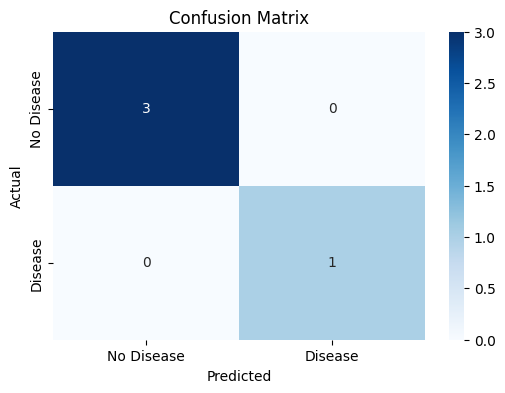

In [2]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (Assuming 'heart_disease.csv' with medical features)
df = pd.read_csv("heart_disease.csv")

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 3: Preprocess Data

# Define features (X) and target variable (y)
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Step 4: Train Logistic Regression Model

# Train Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
      
# Step 5: Evaluate Model Performance

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()